In [1]:
import pandas as pd 
from pyvis.network import Network
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### Load and organize data

In [2]:
#Get the intracellular interactions from BRENDA as dataframe
df = pd.read_csv('C:/Users/Elin/Documents/GitHub/predicting-allostery/datafiles/interactions/BRENDA_interactions_intracellular.txt', header=0, index_col=0)

In [3]:
#Make a dictionary of all metabolite synonyms for the same ChEBI ids
df_mets_grouped = df[['Met', 'ChEBI']].drop_duplicates().groupby(['ChEBI'])['Met'].apply(list).reset_index()
mets_dict = pd.Series(df_mets_grouped.Met.values, index=df_mets_grouped.ChEBI).to_dict()

In [4]:
#Make a dataframe of interactions based on ChEBI id
df_chebi = df[['EC', 'Enz', 'Org', 'Mode', 'ChEBI']].drop_duplicates().reset_index(drop=True)

In [5]:
#Make a dataframe of unique interactions (organism-independent)
df_unique = df_chebi[['EC', 'Enz', 'Mode', 'ChEBI']].drop_duplicates().reset_index(drop=True)

### Extract number of proteins, metabolites, activations/inhibitions and activators/inhibitors

In [6]:
interactions = len(df_chebi)
proteins = len(set(df_chebi.EC))
metabolites = len(set(df_chebi.ChEBI))
activations = len(df_chebi.query('Mode == "+"'))
inhibitions =  len(df_chebi.query('Mode == "-"'))
activators =  len(set(df_chebi.query('Mode == "+"')['ChEBI']))
inhibitors = len(set(df_chebi.query('Mode == "-"')['ChEBI']))

#### Unique numbers

In [29]:
interactions_u = len(df_unique)
activations_u = len(df_unique.query('Mode == "+"'))
inhibitions_u =  len(df_unique.query('Mode == "-"'))

### Find most frequent activator compounds

In [19]:
#Count the number of interactions for each activator (ChEBI id)
top_activators = df_chebi.query('Mode == "+"')['ChEBI'].value_counts().to_frame().reset_index()
top_activators.columns = ['ChEBI', 'Count']
top_activators['Met'] = top_activators['ChEBI'].map(mets_dict)

In [22]:
#Show the top ten activators
top_activators.head(13)

,ChEBI,Count,Met
0,CHEBI:15422,335,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'..."
1,CHEBI:16856,324,"[GSH, glutathione, reduced glutathione, glutat..."
2,CHEBI:35235,314,"[cysteine, L-cysteine, Cys, L-Cys]"
3,CHEBI:28013,205,"[D-fructose 1,6-bisphosphate, D-fructose 1,6-d..."
4,CHEBI:29073,202,"[ascorbic acid, ascorbate, L-ascorbate, L-asco..."
5,CHEBI:16027,182,"[AMP, 5'-AMP, 5'-adenylic acid, adenosine 5'-m..."
6,CHEBI:16761,160,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos..."
7,CHEBI:16236,154,"[ethanol, ethyl alcohol]"
8,CHEBI:15996,118,"[GTP, guanosine 5'-triphosphate, 5'-GTP, guano..."
9,CHEBI:16474,110,"[NADPH, NAD(P)H, beta-NADPH]"


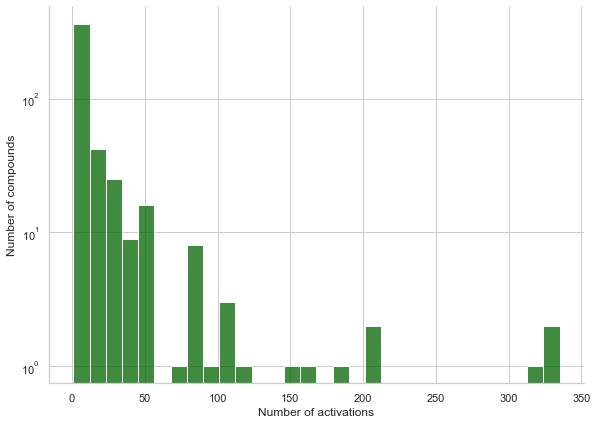

In [18]:
#Plot frequency distribution of activators
ax = sns.displot(data=top_activators, x='Count', kind='hist', height=6, aspect=1.4, bins=30, log_scale=[False, True], color='darkgreen')
ax.set_xlabels('Number of activations')
ax.set_ylabels('Number of compounds')

#### Unique interactions: activators

In [38]:
#Count the number of interactions for each activator (ChEBI id)
top_activators_u = df_unique.query('Mode == "+"')['ChEBI'].value_counts().to_frame().reset_index()
top_activators_u.columns = ['ChEBI', 'Count']
top_activators_u['Met'] = top_activators_u['ChEBI'].map(mets_dict)

In [41]:
top_activators_u.head(10)

,ChEBI,Count,Met
0,CHEBI:16856,217,"[GSH, glutathione, reduced glutathione, glutat..."
1,CHEBI:35235,217,"[cysteine, L-cysteine, Cys, L-Cys]"
2,CHEBI:15422,190,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'..."
3,CHEBI:29073,107,"[ascorbic acid, ascorbate, L-ascorbate, L-asco..."
4,CHEBI:16236,102,"[ethanol, ethyl alcohol]"
5,CHEBI:16761,77,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos..."
6,CHEBI:17754,75,"[glycerol, glycerin, 1,2,3-propanetriol]"
7,CHEBI:28262,73,"[dimethyl sulfoxide, DMSO, dimethylsulfoxid, D..."
8,CHEBI:4167,67,"[glucose, D-glucose, dextrose]"
9,CHEBI:17790,63,"[methanol, methyl alcohol]"


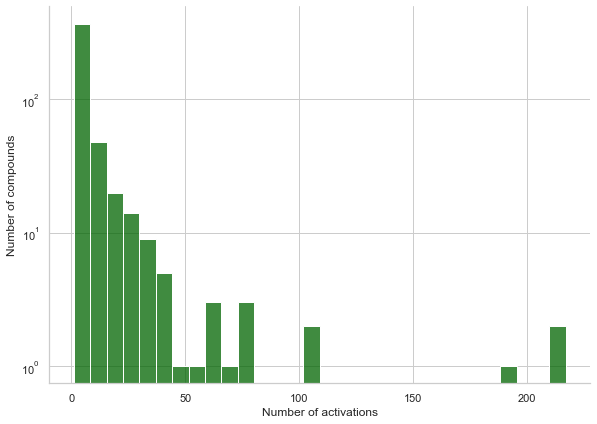

In [50]:
#Plot frequency distribution of activators
ax = sns.displot(data=top_activators_u, x='Count', kind='hist', height=6, aspect=1.4, bins=30, log_scale=[False, True], color='darkgreen')
ax.set_xlabels('Number of activations')
ax.set_ylabels('Number of compounds')

### Find most frequent inhibitory compounds

In [23]:
#Count the number of interactions for each inhibitor (ChEBI id)
top_inhibitors = df_chebi.query('Mode == "-"')['ChEBI'].value_counts().to_frame().reset_index()
top_inhibitors.columns = ['ChEBI', 'Count']
top_inhibitors['Met'] = top_inhibitors['ChEBI'].map(mets_dict)

In [26]:
#Show the top ten inhibitors
top_inhibitors.head(10)

,ChEBI,Count,Met
0,CHEBI:15422,1083,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'..."
1,CHEBI:16761,914,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos..."
2,CHEBI:16027,749,"[AMP, 5'-AMP, 5'-adenylic acid, adenosine 5'-m..."
3,CHEBI:35235,511,"[cysteine, L-cysteine, Cys, L-Cys]"
4,CHEBI:16199,435,"[Urea, CO(NH2)2]"
5,CHEBI:16908,412,"[NADH, beta-NADH]"
6,CHEBI:16856,366,"[GSH, glutathione, reduced glutathione, glutat..."
7,CHEBI:30769,357,"[citrate, Citric acid, Magnesium citrate]"
8,CHEBI:4167,346,"[glucose, D-glucose, dextrose]"
9,CHEBI:18009,307,"[NADP+, NAD(P)+, NADP, beta-NADP+]"


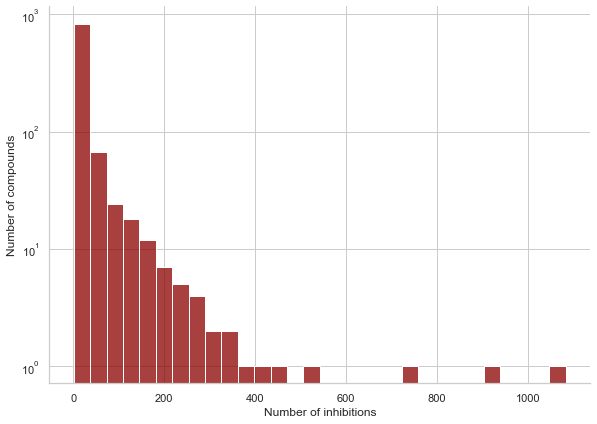

In [27]:
#Plot frequency distribution of inhibitors
ax = sns.displot(data=top_inhibitors, x='Count', kind='hist', height=6, aspect=1.4, bins=30, log_scale=[False, True], color='darkred')
ax.set_xlabels('Number of inhibitions')
ax.set_ylabels('Number of compounds')

#### Unique interactions: inhibitors

In [46]:
#Count the number of interactions for each inhibitor (ChEBI id)
top_inhibitors_u = df_unique.query('Mode == "-"')['ChEBI'].value_counts().to_frame().reset_index()
top_inhibitors_u.columns = ['ChEBI', 'Count']
top_inhibitors_u['Met'] = top_inhibitors_u['ChEBI'].map(mets_dict)

In [51]:
top_inhibitors_u.head(10)

,ChEBI,Count,Met
0,CHEBI:15422,460,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'..."
1,CHEBI:16761,369,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos..."
2,CHEBI:16027,317,"[AMP, 5'-AMP, 5'-adenylic acid, adenosine 5'-m..."
3,CHEBI:35235,271,"[cysteine, L-cysteine, Cys, L-Cys]"
4,CHEBI:16199,261,"[Urea, CO(NH2)2]"
5,CHEBI:16856,203,"[GSH, glutathione, reduced glutathione, glutat..."
6,CHEBI:16908,199,"[NADH, beta-NADH]"
7,CHEBI:16236,189,"[ethanol, ethyl alcohol]"
8,CHEBI:30769,180,"[citrate, Citric acid, Magnesium citrate]"
9,CHEBI:18009,175,"[NADP+, NAD(P)+, NADP, beta-NADP+]"


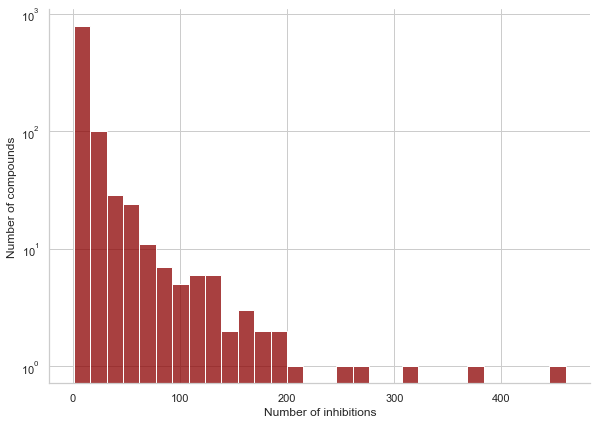

In [49]:
#Plot frequency distribution of inhibitors
ax = sns.displot(data=top_inhibitors_u, x='Count', kind='hist', height=6, aspect=1.4, bins=30, log_scale=[False, True], color='darkred')
ax.set_xlabels('Number of inhibitions')
ax.set_ylabels('Number of compounds')

### Find most frequently targeted enzymes

In [6]:
#Count the number of interactions for each enzyme/EC number
top_enz_targets = df_chebi[['Enz', 'EC']].value_counts().to_frame().reset_index()
top_enz_targets.columns = ['Enz', 'EC', 'Count']

In [53]:
#Show the top ten regulated enzymes
top_enz_targets.head(10)

,Enz,EC,Count
0,glucose-1-phosphate adenylyltransferase,2.7.7.27,926
1,pyruvate kinase,2.7.1.40,314
2,beta-glucosidase,3.2.1.21,295
3,6-phosphofructokinase,2.7.1.11,260
4,tyrosinase,1.14.18.1,247
5,phosphoenolpyruvate carboxylase,4.1.1.31,210
6,glycogen phosphorylase,2.4.1.1,188
7,glutamine synthetase,6.3.1.2,171
8,L-lactate dehydrogenase,1.1.1.27,164
9,citrate synthase (unknown stereospecificity),2.3.3.16,154


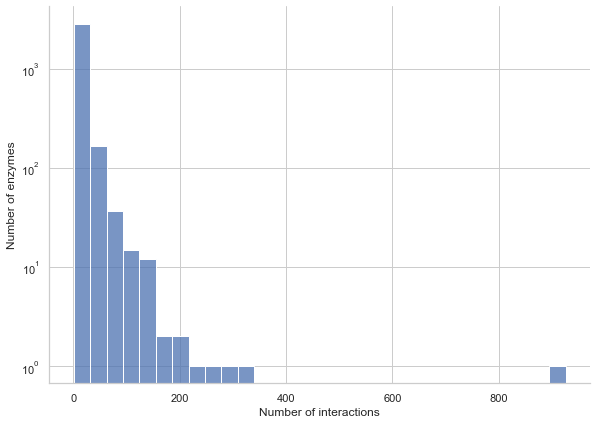

In [54]:
#Plot frequency distribution of enzymes
ax = sns.displot(data=top_enz_targets, x='Count', kind='hist', height=6, aspect=1.4, bins=30, log_scale=[False, True])
ax.set_xlabels('Number of interactions')
ax.set_ylabels('Number of enzymes')

#### Unique interactions: enzymes

In [7]:
#Count the number of interactions for each enzyme/EC number
top_enz_targets_u = df_unique[['Enz', 'EC']].value_counts().to_frame().reset_index()
top_enz_targets_u.columns = ['Enz', 'EC', 'Count']

In [61]:
top_enz_targets_u.head(15)

,Enz,EC,Count
0,pyruvate kinase,2.7.1.40,78
1,tyrosinase,1.14.18.1,69
2,5'-nucleotidase,3.1.3.5,66
3,glycogen phosphorylase,2.4.1.1,64
4,glutamate dehydrogenase,1.4.1.2,61
5,phosphoenolpyruvate carboxylase,4.1.1.31,59
6,phosphogluconate dehydrogenase (NADP+-dependen...,1.1.1.44,58
7,beta-glucosidase,3.2.1.21,56
8,malate dehydrogenase (oxaloacetate-decarboxyla...,1.1.1.40,55
9,aldose reductase,1.1.1.21,53


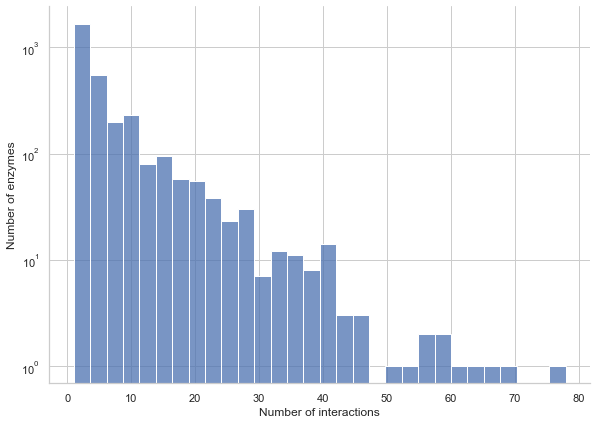

In [8]:
#Plot frequency distribution of enzymes
ax = sns.displot(data=top_enz_targets_u, x='Count', kind='hist', height=6, aspect=1.4, bins=30, log_scale=[False, True])
ax.set_xlabels('Number of interactions')
ax.set_ylabels('Number of enzymes')

### Find organisms with most documented interactions

In [58]:
#Count number of interactions documented for each organism
top_organisms = df_unique_chebi['Org'].value_counts().to_frame().reset_index()
top_organisms.columns = ['Org', 'Count']

In [16]:
#Show the top ten organisms
top_organisms.head(10)

,Org,Count
0,Homo sapiens,2646
1,Rattus norvegicus,2438
2,Escherichia coli,1718
3,Bos taurus,1247
4,Saccharomyces cerevisiae,780
5,Mus musculus,768
6,Sus scrofa,716
7,Oryctolagus cuniculus,476
8,Arabidopsis thaliana,318
9,Gallus gallus,307


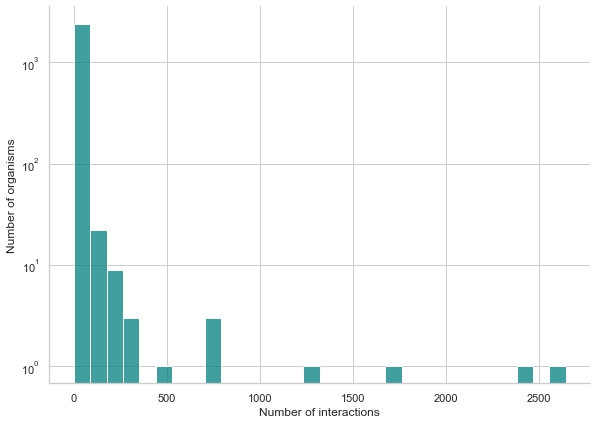

In [17]:
#Plot frequency distribution of organisms
ax = sns.displot(data=top_organisms, x='Count', kind='hist', height=6, aspect=1.4, bins=30, log_scale=[False, True], color='Teal')
ax.set_xlabels('Number of interactions')
ax.set_ylabels('Number of organisms')

### Make scatter plot of activators versus inhibitors

In [22]:
#Create dataframe for plotting scatter plot
intersection = pd.merge(top_activators, top_inhibitors, how='outer', on='ChEBI').fillna(0)
intersection.head(10)

,ChEBI,Count_x,Met_x,Count_y,Met_y
0,CHEBI:15422,335.0,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'...",1083.0,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'..."
1,CHEBI:16856,324.0,"[GSH, glutathione, reduced glutathione, glutat...",366.0,"[GSH, glutathione, reduced glutathione, glutat..."
2,CHEBI:35235,314.0,"[cysteine, L-cysteine, Cys, L-Cys]",511.0,"[cysteine, L-cysteine, Cys, L-Cys]"
3,CHEBI:28013,205.0,"[D-fructose 1,6-bisphosphate, D-fructose 1,6-d...",156.0,"[D-fructose 1,6-bisphosphate, D-fructose 1,6-d..."
4,CHEBI:29073,202.0,"[ascorbic acid, ascorbate, L-ascorbate, L-asco...",209.0,"[ascorbic acid, ascorbate, L-ascorbate, L-asco..."
5,CHEBI:16027,182.0,"[AMP, 5'-AMP, 5'-adenylic acid, adenosine 5'-m...",749.0,"[AMP, 5'-AMP, 5'-adenylic acid, adenosine 5'-m..."
6,CHEBI:16761,160.0,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos...",914.0,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos..."
7,CHEBI:16236,154.0,"[ethanol, ethyl alcohol]",281.0,"[ethanol, ethyl alcohol]"
8,CHEBI:15996,118.0,"[GTP, guanosine 5'-triphosphate, 5'-GTP, guano...",291.0,"[GTP, guanosine 5'-triphosphate, 5'-GTP, guano..."
9,CHEBI:16474,110.0,"[NADPH, NAD(P)H, beta-NADPH]",261.0,"[NADPH, NAD(P)H, beta-NADPH]"


[Text(340.0, 1083.0, 'ATP'),
 Text(329.0, 366.0, 'GSH'),
 Text(319.0, 511.0, 'cysteine'),
 Text(210.0, 156.0, 'D-fructose 1,6-bisphosphate'),
 Text(207.0, 209.0, 'ascorbic acid'),
 Text(187.0, 749.0, 'AMP'),
 Text(165.0, 914.0, 'ADP'),
 Text(159.0, 281.0, 'ethanol')]

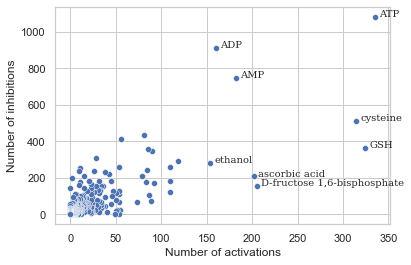

In [19]:
#Make scatter-plot with labels for top compounds
ax = sns.scatterplot(intersection, x='Count_x', y='Count_y')
ax.set(xlabel='Number of activations', ylabel='Number of inhibitions')
[plt.text(x=row['Count_x']+5, y=row['Count_y'], s=row['Met_x'][0], fontfamily='serif') for k, row in intersection.iterrows() if row['Count_x'] > 150]


#### Unique interactions: scatter plot

In [71]:
#Create dataframe for plotting scatter plot
intersection_u = pd.merge(top_activators_u, top_inhibitors_u, how='outer', on='ChEBI').fillna(0)
intersection_u.head(10)

,ChEBI,Count_x,Met_x,Count_y,Met_y
0,CHEBI:16856,217.0,"[GSH, glutathione, reduced glutathione, glutat...",203.0,"[GSH, glutathione, reduced glutathione, glutat..."
1,CHEBI:35235,217.0,"[cysteine, L-cysteine, Cys, L-Cys]",271.0,"[cysteine, L-cysteine, Cys, L-Cys]"
2,CHEBI:15422,190.0,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'...",460.0,"[ATP, Adenosine triphosphate, rATP, 5'-ATP, 5'..."
3,CHEBI:29073,107.0,"[ascorbic acid, ascorbate, L-ascorbate, L-asco...",121.0,"[ascorbic acid, ascorbate, L-ascorbate, L-asco..."
4,CHEBI:16236,102.0,"[ethanol, ethyl alcohol]",189.0,"[ethanol, ethyl alcohol]"
5,CHEBI:16761,77.0,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos...",369.0,"[ADP, 5'-ADP, 5'-adenosine diphosphate, Adenos..."
6,CHEBI:17754,75.0,"[glycerol, glycerin, 1,2,3-propanetriol]",81.0,"[glycerol, glycerin, 1,2,3-propanetriol]"
7,CHEBI:28262,73.0,"[dimethyl sulfoxide, DMSO, dimethylsulfoxid, D...",125.0,"[dimethyl sulfoxide, DMSO, dimethylsulfoxid, D..."
8,CHEBI:4167,67.0,"[glucose, D-glucose, dextrose]",131.0,"[glucose, D-glucose, dextrose]"
9,CHEBI:17790,63.0,"[methanol, methyl alcohol]",124.0,"[methanol, methyl alcohol]"


[Text(222.0, 203.0, 'GSH'),
 Text(222.0, 271.0, 'cysteine'),
 Text(195.0, 460.0, 'ATP'),
 Text(112.0, 121.0, 'ascorbic acid'),
 Text(107.0, 189.0, 'ethanol'),
 Text(82.0, 369.0, 'ADP'),
 Text(67.0, 317.0, 'AMP'),
 Text(63.0, 261.0, 'Urea')]

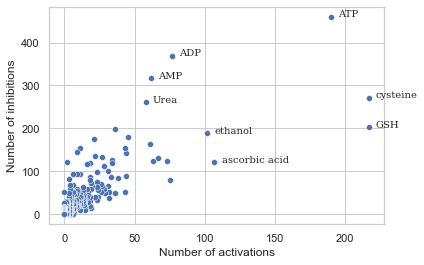

In [76]:
#Make scatter-plot with labels for top compounds
ax = sns.scatterplot(intersection_u, x='Count_x', y='Count_y')
ax.set(xlabel='Number of activations', ylabel='Number of inhibitions')
[plt.text(x=row['Count_x']+5, y=row['Count_y'], s=row['Met_x'][0], fontfamily='serif') for k, row in intersection_u.iterrows() if row['Count_x'] > 100 or row['Count_y'] > 200]


### Make network of interactions for top enzymes

In [39]:
#Initialize network
net = Network(height="2500px", width="2100px")

#### Find top regulated enzymes

In [40]:
#Make dataframe of top enzymes and their interactions
top_enz_with_interactions = pd.merge(top_enz_targets.head(10), df_unique_chebi[['EC', 'ChEBI', 'Mode']], how='left', on='EC').drop_duplicates()

In [42]:
#Add enzymes as square orange nodes
net.add_nodes(list(set(top_enz_with_interactions['Enz'])), shape=['box' for i in range(10)], color=['orange' for i in range(10)])

#### Find the top metabolic regulators (interact with two or more enzymes)

In [43]:
#Group enzymes by ChEBI id to find number of enzyme targets for each metabolite
df_enz_groups = top_enz_with_interactions.groupby('ChEBI')['Enz'].apply(set).reset_index()

In [44]:
#Count number of enzyme targets
df_enz_groups['Count'] = df_enz_groups.agg({'Enz': len})

In [45]:
#Filter for metabolites targeting two or more enzymes
df_top_mets = df_enz_groups[df_enz_groups['Count'] >= 2]

In [54]:
#Map metabolite ChEBI id to metabolite names, and reduce to one synonym for each metabolite
df_top_mets['Met'] = df_top_mets['ChEBI'].map(mets_dict)
df_top_mets['Met'] = df_top_mets['Met'].apply(lambda x: x[0])

C:\Users\Elin\AppData\Local\Temp\ipykernel_3348\2824346124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_mets['Met'] = df_top_mets['ChEBI'].map(mets_dict)


In [58]:
#Add metabolites as nodes
net.add_nodes(set(df_top_mets['Met']))

#### Find edges (interactions between enzymes and metabolites)

In [59]:
#Reduce dataframe to frame of interactions between the top enzymes and top metabolites
top_enz_with_top_interactions = top_enz_with_interactions[top_enz_with_interactions['ChEBI'].isin(list(df_top_mets['ChEBI']))].reset_index()

In [61]:
#Map ChEBI ids to metabolite names
top_enz_with_top_interactions['Met'] = top_enz_with_top_interactions['ChEBI'].map(mets_dict)
top_enz_with_top_interactions['Met'] = top_enz_with_top_interactions['Met'].apply(lambda x: x[0])

##### Add edges to network

In [63]:
#Make list of lists of Metabolic regulator, Enzyme target, Mode of interaction

pairs = []

for index, row in top_enz_with_top_interactions.iterrows():
    pairs.append([row['Met'], row['Enz'], row['Mode']])

In [66]:
#Add edges to network with red for inhibitions and green for activations
for pair in pairs:
    if pair[2] == "+":
        color = 'green'
    else:
        color = 'red'
    net.add_edge(pair[0], pair[1], color=color)

#### Visualize network

In [67]:
#Supply the visualization with a user interface for altering settings and improving the layout
net.show_buttons(filter_=['physics'])

In [69]:
#Create the file that shows the network
net.show('network.html')